# Introducción
El objetivo del presente documento es generar un estudio exploratorio de que variables afectan el fondo de inversion crecimiento dolares de la sociedad administradora de fondos Vista

# Sobre los datos
Se presenta la serie cronologica de mayo 2016 a mayo 2021 que continene 6 columnas, 


Los datos que utiliza se extrae de distinta bases de datos. 

Los precios del fondo de inversion provienen de www.acobo.com

El PIB de Costa Rica, El tipo de cambio, la tasa basica pasiva proviene del banco central de Costa Rica www.bccr.fi.cr

EL PIB de Estados Unidos y la tasa fed proviene de las bases de datos del Fondo Monetario Internacional https://www.imf.org/

**Descripción de la estructura de datos:
Se tiene un archivo CSV con 7 columnas y 61 lineas**

**Fecha:** Fecha en formato m/d/yyyy 

**PIB USA:** Es el numero indice del PIB de estados unidos 

**PIB CR:** Es el numero indice del PIB de Costa Rica

**TC:** Se refiere al tipo de cambio nominal promedio del mes

**Tasa Fed:** Se refiere a la tasa de rendimiento de un bono soberano en USA.

**Tasa Pasiva:** Se refiere a la tasa basica pasiva de Costa Rica que funciona como indicador del rendimiento esperado de las inversiones. 

**Precio** Fondo: Se refiere al precio del fondo crecimiento renta dolares.

# Índice
Carga de datos
Exploración de los datos

In [1]:
# Bibliotecas requeridas para el ejercicio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats
#import torch as torch

# Gráficas estadísticas
import seaborn as sns

In [2]:
#Carga de los datos de los precios y variables economicas relativas

df = pd.read_csv(r"C:\Users\MILTON MEDINA P\Documents\01-Educacion y Formacion\Ciencia de datos\Modulo 2- Aprendizaje Automatico\Base Datos Proyecto Apredizaje Automatico.csv")

print(df)

       Fecha    PIB_USA  PIB_CR          TC  TasaFed   TasaPasiva   \
0   5/1/2016  99.980561    95.4  537.512742     0.37      5.385484   
1   6/1/2016  99.954770    95.7  543.392833     0.38      5.313333   
2   7/1/2016  99.934331    94.9  548.217742     0.39      5.141935   
3   8/1/2016  99.915868    94.8  550.647419     0.40      5.008065   
4   9/1/2016  99.896173    98.1  552.188833     0.40      4.781667   
..       ...        ...     ...         ...      ...           ...   
56  1/1/2021  96.691888    97.4  611.828387     0.09      3.506452   
57  2/1/2021  96.934801    99.8  611.008393     0.08      3.485714   
58  3/1/2021  97.182444   107.3  610.957097     0.07      3.416129   
59  4/1/2021  97.429796   102.3  613.225333     0.07      3.265000   
60  5/1/2021  97.679598   105.3  615.400000     0.06      3.204839   

     PrecioFondo   CurvaSoberana  
0      100.176784           4.09  
1      100.539349           4.18  
2      101.130188           4.15  
3      101.737123  

In [3]:
# Columnas que contiene el dataframe
df.columns

Index(['Fecha', 'PIB_USA', 'PIB_CR', 'TC', 'TasaFed', ' TasaPasiva ',
       ' PrecioFondo ', 'CurvaSoberana'],
      dtype='object')

In [4]:
df[' PrecioFondo ']

0     100.176784
1     100.539349
2     101.130188
3     101.737123
4     102.313886
         ...    
56    122.382670
57    126.256145
58    127.927439
59    129.191721
60    130.718032
Name:  PrecioFondo , Length: 61, dtype: float64

## Escalar los datos

Cuando se estudia un fenómeno, algunas de las características difieren en escala de otras, por ejemplo, el alto de una persona adulta es un valor que puede ir de 62cm a 2.72m y el salario de una persona, en colones, puede rondar entre 300 mil y 10 millones de colones. El problema con estas diferencias, es que las características con valores más altos dominarán el proceso de aprendizaje. Sin embargo, no es correcto decir que esas características sean más importantes para realizar la predicción. 

El escalar los datos permite transformar estos a una escala común. Después de escalados, todas las características tienen una influencia similar en los resultados del modelo, mejorando la eficiencia del entrenamiento y el rendimiento del algoritmo de aprendizaje. 

Tipos de escalado de datos: **normalización y estandarización**.  

- La **normalización** es un cambio de escala de los datos del rango original para que todos los valores estén dentro del rango de 0 y 1. Se requiere conocer de antemano el valor mínimo y máximo de los datos, si esto no es factible, la normalización puede no ser el mejor método a aplicar. 

Un valor se normaliza de la siguiente forma:

$$y = (x - min) / (max - min)$$

Para realizar la normalización se puede utilizar la función MinMaxScaler() de la biblioteca Scikit-learn como lo muestra el siguiente ejemplo.


In [5]:

x = df.loc[:,df.columns!="Fecha"]
#returns a numpy array
#print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
columnn_names=['PIB_USA', 'PIB_CR', 'TC', 'TasaFed', ' TasaPasiva ',' PrecioFondo ','CurvaSoberana']
#print(x_scaled)
df_scaled=pd.DataFrame(x_scaled, columns=columnn_names)
df_scaled['Fecha']=df['Fecha']
print(df_scaled)

     PIB_USA    PIB_CR        TC   TasaFed   TasaPasiva    PrecioFondo   \
0   0.962667  0.212264  0.000000  0.135021      0.691867       0.000000   
1   0.959952  0.226415  0.075495  0.139241      0.668975       0.011871   
2   0.957801  0.188679  0.137442  0.143460      0.614595       0.031217   
3   0.955858  0.183962  0.168637  0.147679      0.572121       0.051090   
4   0.953786  0.339623  0.188427  0.147679      0.500290       0.069974   
..       ...       ...       ...       ...           ...            ...   
56  0.616562  0.306604  0.954144  0.016878      0.095695       0.727079   
57  0.642126  0.419811  0.943616  0.012658      0.089115       0.853906   
58  0.668189  0.773585  0.942957  0.008439      0.067037       0.908629   
59  0.694220  0.537736  0.972079  0.008439      0.019088       0.950025   
60  0.720510  0.679245  1.000000  0.004219      0.000000       1.000000   

    CurvaSoberana     Fecha  
0        0.311077  5/1/2016  
1        0.324734  6/1/2016  
2        

## Distribución y correlación de los datos

El diagrama de dispersión permite estudiar las relaciones entre dos variables. 

Las relaciones entre los conjuntos asociados de datos se infieren a partir de la forma de las nubes.

- Una relación positiva entre x y y significa que los valores crecientes de x están asociados con los valores crecientes de y.
- Una relación negativa significa que los valores crecientes de x están asociados con los valores decrecientes de y. 

Para los datos del fondo crecimiento la variable dependiente o el target en este caso es el precio del fondo, si el precio aumenta significa que las personas en el fondo ganan dinero.


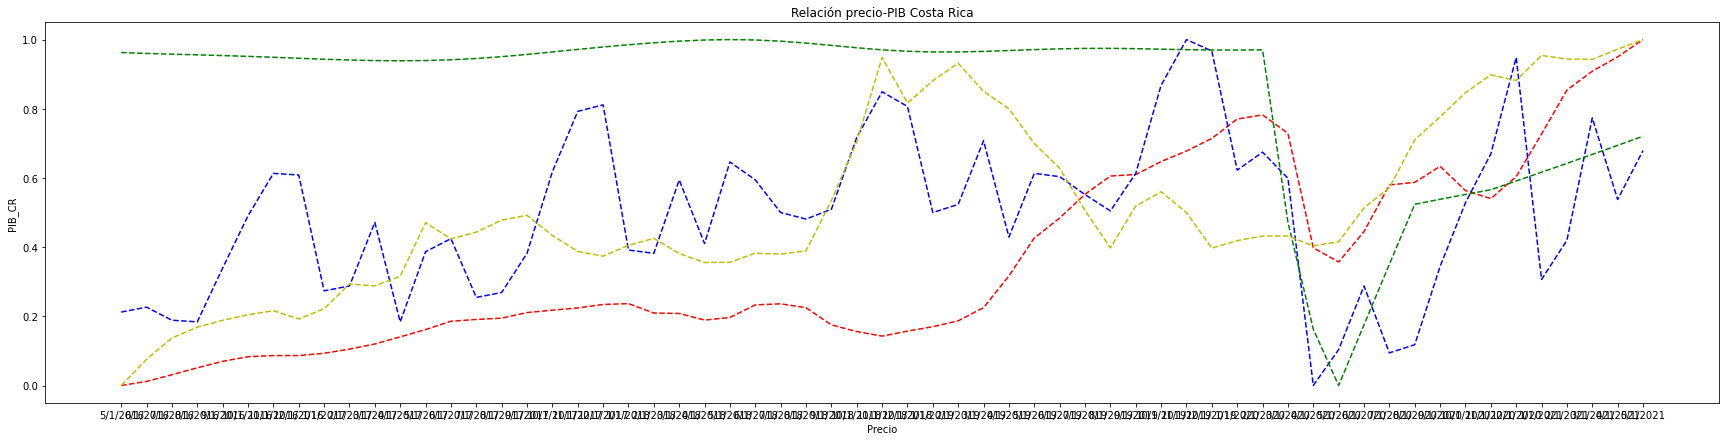

In [6]:
# distribución del precio y el PIB de CR
# Observe los datos atípicos

def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(30,7))
    plt.plot(df_scaled['Fecha'],df_scaled[ ' PrecioFondo '],'r--',df_scaled['PIB_CR'],'b--',df_scaled['PIB_USA'],'g--',df_scaled['TC'],'y--')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    
plot_data(df,'PIB_CR',' PrecioFondo ','Precio','PIB_CR','Relación precio-PIB Costa Rica')    


In [7]:
# Correlación lineal entre las variables
# ==============================================================================
#PIB de Costa Rica
corr_test = pearsonr(x = df_scaled[ ' PrecioFondo '], y =  df_scaled['PIB_CR'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
print("-----------------------------------------------------")
#PIB USA
corr_test = pearsonr(x = df_scaled[ ' PrecioFondo '], y =  df_scaled['PIB_USA'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
print("-----------------------------------------------------")
#TC
corr_test = pearsonr(x = df_scaled[ ' PrecioFondo '], y =  df_scaled['TC'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
print("-----------------------------------------------------")
#Tasa Fed
corr_test = pearsonr(x = df_scaled[ ' PrecioFondo '], y =  df_scaled['TasaFed'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])
print("-----------------------------------------------------")
#Tasa Pasiva
corr_test = pearsonr(x = df_scaled[ ' PrecioFondo '], y =  df_scaled[' TasaPasiva '])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
#print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.300071741927132
P-value:  0.018794727195310626
-----------------------------------------------------
Coeficiente de correlación de Pearson:  -0.4249475916226908
P-value:  0.0006410313918739876
-----------------------------------------------------
Coeficiente de correlación de Pearson:  0.5754927286760566
P-value:  1.2236357033593466e-06
-----------------------------------------------------
Coeficiente de correlación de Pearson:  -0.19685260277630137
P-value:  0.12836461108535088
-----------------------------------------------------
Coeficiente de correlación de Pearson:  -0.444216500651203


In [8]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Variable_1','Variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['Variable_1'] != corr_mat['Variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = df_scaled.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

,Variable_1,Variable_2,r,abs_r
46,CurvaSoberana,TasaPasiva,0.903401,0.903401
34,TasaPasiva,CurvaSoberana,0.903401,0.903401
45,CurvaSoberana,TasaFed,0.885507,0.885507
27,TasaFed,CurvaSoberana,0.885507,0.885507
25,TasaFed,TasaPasiva,0.883514,0.883514
31,TasaPasiva,TasaFed,0.883514,0.883514
4,PIB_USA,TasaPasiva,0.743893,0.743893
28,TasaPasiva,PIB_USA,0.743893,0.743893
3,PIB_USA,TasaFed,0.642709,0.642709
21,TasaFed,PIB_USA,0.642709,0.642709


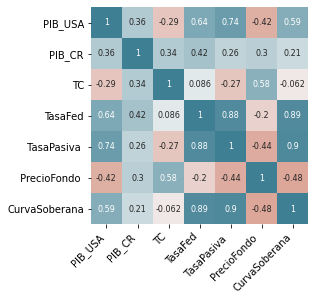

In [9]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

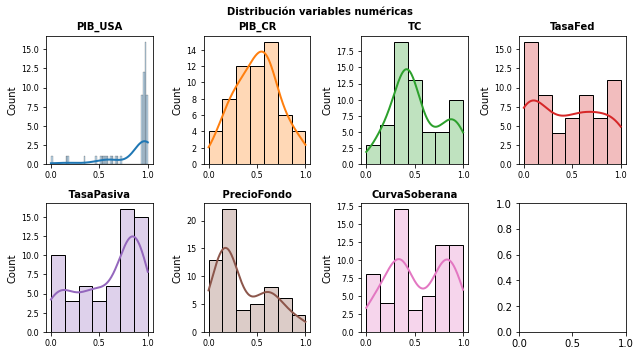

In [10]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(9, 5))
axes = axes.flat
columnas_numeric = df_scaled.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_scaled,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Resultado del coeficiente de Pearson
De lo anterior se desprende que la tasa FED y la tasa basica pasiva no tienen una relacion estrecha para determinar el precio del fondo y pueden obviarse en nuestro analisis con esto nos quedamos con el PIB de Costa Rica, el PIB de Estados Unidos y el tipo de cambio. 

In [11]:
#Eliminar columnas que no usaremos en el modelo
#df_scaled.drop([' TasaPasiva ', 'TasaFed'], axis = 'columns', inplace=True)
print (df_scaled.columns)

Index(['PIB_USA', 'PIB_CR', 'TC', 'TasaFed', ' TasaPasiva ', ' PrecioFondo ',
       'CurvaSoberana', 'Fecha'],
      dtype='object')


In [12]:
# División de los datos en train y test
# ==============================================================================
X = df_scaled[['PIB_USA', 'PIB_CR', 'TC', 'CurvaSoberana']]
y = df_scaled[' PrecioFondo ']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [13]:
# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     15.65
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           5.60e-08
Time:                        17:23:08   Log-Likelihood:                 16.592
No. Observations:                  48   AIC:                            -23.18
Df Residuals:                      43   BIC:                            -13.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2976      0.127      2.340

In [14]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,0.041170,0.554004
PIB_USA,-0.509186,0.121991
PIB_CR,0.079304,0.689895
TC,0.145779,0.664998
CurvaSoberana,-0.558923,-0.121218


In [15]:
# Diagnóstico errores (residuos) de las predicciones de entrenamiento
# ==============================================================================
y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

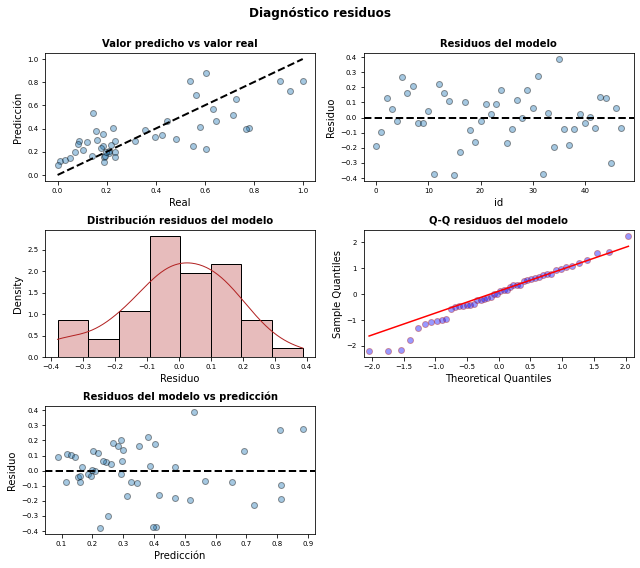

In [16]:
# Gráficos
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediccion_train, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");

In [17]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.978977382183075, pvalue=0.5368384122848511)

In [18]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")


Estadítico= 1.1025804617934825, p-value = 0.576205891925752


# Predicciones


In [19]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
60,0.813371,0.072891,0.666372,0.960370,0.419979,1.206762
58,0.812405,0.065256,0.680803,0.944007,0.424504,1.200306
4,0.202284,0.049195,0.103073,0.301495,-0.175857,0.580425
13,0.245621,0.030713,0.183682,0.307560,-0.124493,0.615735


In [20]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 0.16931629901004147
